**Transforms data normal or uniform distro**

In [3]:
#12th notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes = True)
from sklearn.preprocessing import QuantileTransformer

In [4]:
store_visits = pd.read_csv("./Datasets/store_visits.csv")

store_visits.sample(10)

,Visits,Revenue,StoreID
18,1086.003772,5431.018860,1
348,480.823371,660.771458,0
83,1099.135918,5505.679591,1
213,487.446593,628.566919,0
240,566.570006,710.468986,0
333,596.088773,633.630819,0
290,489.633610,547.233484,0
195,914.735292,4593.676460,1
30,943.725789,4738.628947,1
35,1039.246520,5248.232602,1


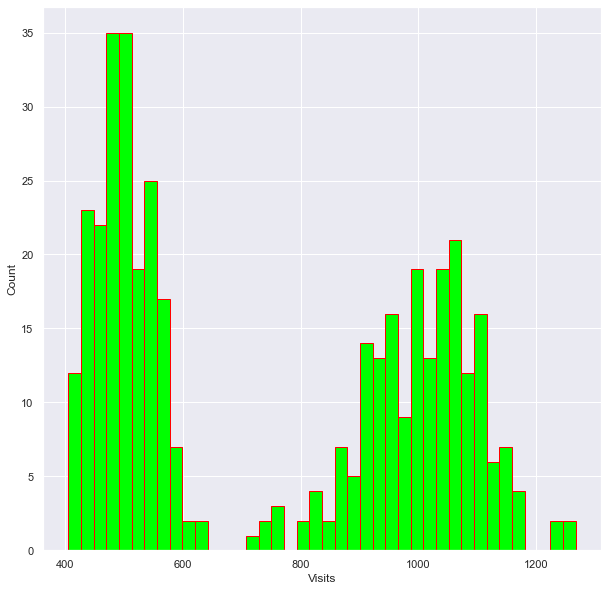

In [6]:
# viz data(distor is chi sqaured)
plt.figure(figsize = (10, 10))

plt.hist(store_visits["Visits"], facecolor = "lime", edgecolor = "red", bins = 40)

plt.xlabel("Visits")
plt.ylabel("Count")

plt.show();

# this shows 2 sep normal distro

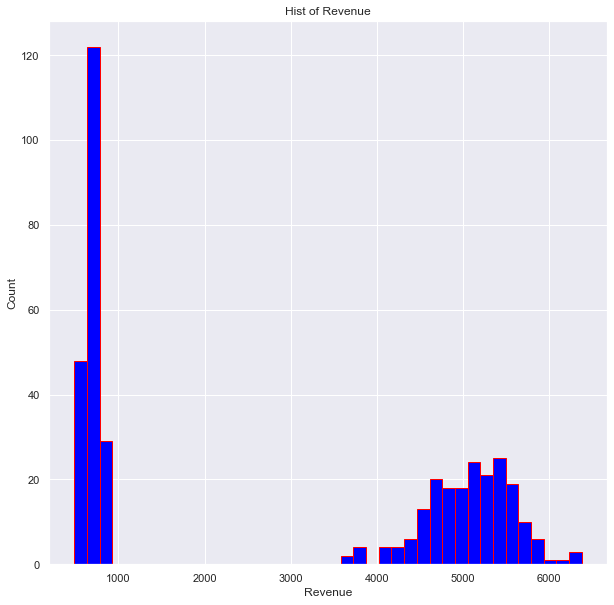

In [8]:
# viz data(distor is chi sqaured)
plt.figure(figsize = (10, 10))

plt.hist(store_visits["Revenue"], facecolor = "blue", edgecolor = "red", bins = 40)

plt.xlabel("Revenue")
plt.ylabel("Count")
plt.title("Hist of Revenue")

plt.show();

# this shows 2 sep normal distro, hence data is not a single normal distro

In [9]:
# use Quantile transformer to make it single normal distro
transformer = QuantileTransformer(output_distribution="normal")

store_transform = transformer.fit_transform(store_visits[["Visits", "Revenue"]])

D:\Anaconda_3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (398). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [10]:
# create new df with the tranformed data
store_transform_df = pd.DataFrame(data = store_transform, columns = ["Visits_transform", "Revenue_transform"])

store_transform_df.head()

,Visits_transform,Revenue_transform
0,0.692434,0.733135
1,0.989501,0.989501
2,0.317809,0.337797
3,0.371416,0.433038
4,1.208903,1.235553


In [13]:
# concat tranformed df with original df
final_df = pd.concat([store_visits, store_transform_df], axis = 1)
final_df.head()

,Visits,Revenue,StoreID,Visits_transform,Revenue_transform
0,1023.178663,5165.893314,1,0.692434,0.733135
1,1058.607260,5349.036298,1,0.989501,0.989501
2,935.069490,4756.347453,1,0.317809,0.337797
3,952.360965,4849.804826,1,0.371416,0.433038
4,1078.384010,5467.920052,1,1.208903,1.235553


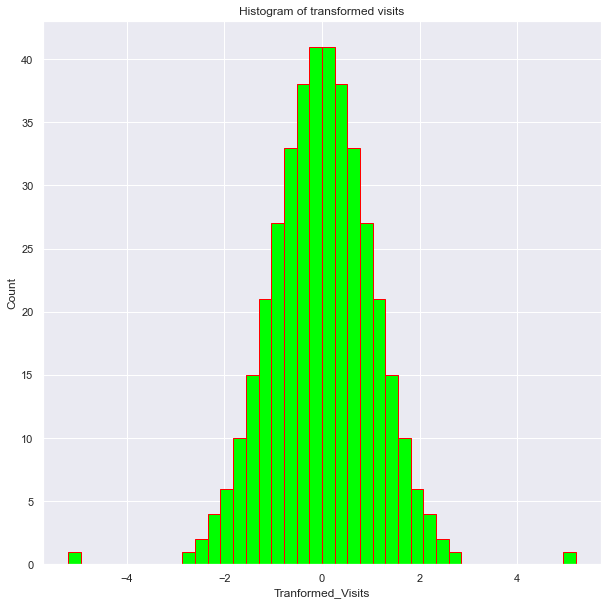

In [15]:
# viz data(distor is chi sqaured)
plt.figure(figsize = (10, 10))

plt.hist(final_df["Visits_transform"], facecolor = "lime", edgecolor = "red", bins = 40)

plt.xlabel("Tranformed_Visits")
plt.ylabel("Count")
plt.title("Histogram of transformed visits")

plt.show();

# shows one distro

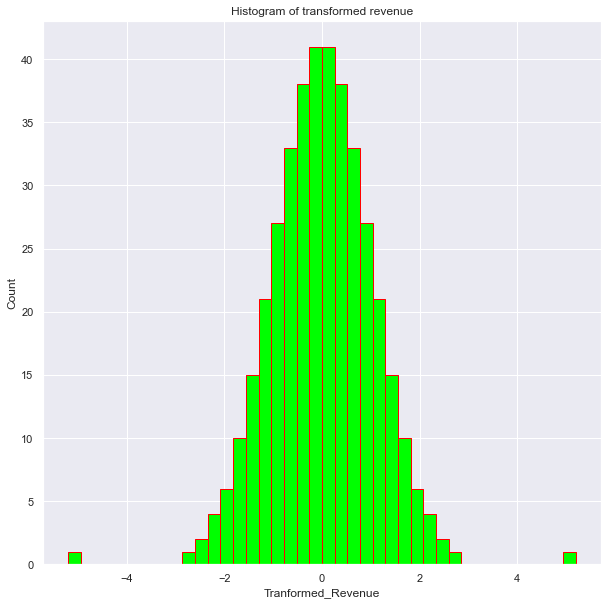

In [16]:
# viz data(distor is chi sqaured)
plt.figure(figsize = (10, 10))

plt.hist(final_df["Revenue_transform"], facecolor = "lime", edgecolor = "red", bins = 40)

plt.xlabel("Tranformed_Revenue")
plt.ylabel("Count")
plt.title("Histogram of transformed revenue")

plt.show();

# shows one normal distro

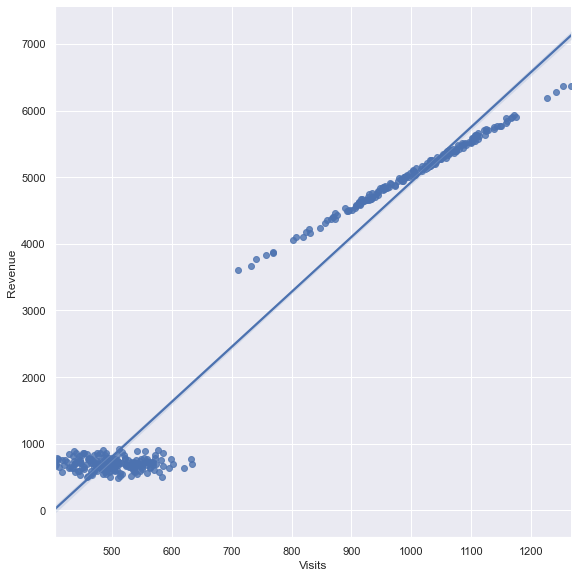

In [17]:
# use sns to plot original data and the regression line of best fit
sns.lmplot(x = "Visits", y = "Revenue", data = final_df, height = 8)
plt.show();

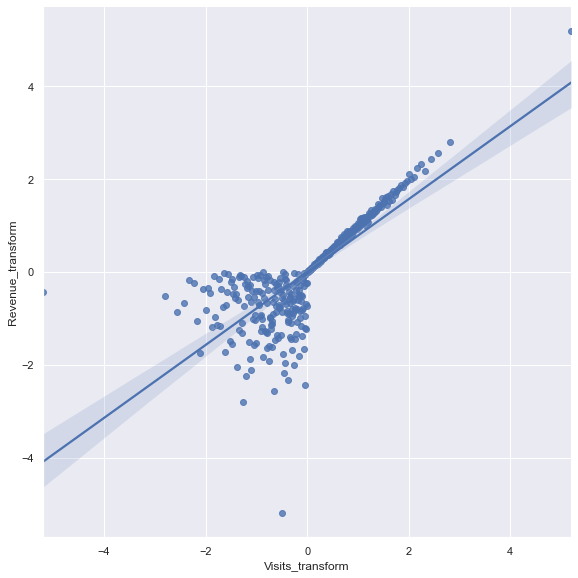

In [19]:
# use sns to plot transformed data and the regression line of best fit
sns.lmplot(x = "Visits_transform", y = "Revenue_transform", data = final_df, height = 8)
plt.show();